# Assignment 5: PCA and Neural Networks (50 marks)
### Due: April 4 at 11:59pm 

### Name: 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (20 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [60]:
# TO DO: Import dataset and inspect the first few columns (1 mark)
df = pd.read_csv("seeds_dataset.txt", delimiter="\t")

print(df.head())

   15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1


Next, you will need to separate the data into your feature matrix and target vector.

In [61]:
# TO DO: Separate the data into feature matrix and target vector. Print the shape of X and y (1 mark)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (209, 7)
y shape: (209,)


### Steps 2+3: Preprocessing and Model Selection (3 marks)

The first step is to split the data into training and testing sets.

In [62]:
# TO DO: Split the data into training and testing sets using 10% for test set (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Now that we have our training data, we need to decide which preprocessing methods to use. Since we do not want any information leaking into the model validation stage, we will need to create a Pipeline. For this case, our model for the Pipeline is `Logistic Regression(max_iter=1000)`.

In [63]:
# TO DO: Setup required preprocessing method(s) and model (1 mark)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Since we're using logistic regression

model = LogisticRegression(max_iter=1000)

In [64]:
# TO DO: Setup pipeline (1 mark)
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', scaler), 
    ('classifier', model)])

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [65]:
param_grid = [{'classifier': [LogisticRegression(max_iter=1000)],
              'classifier__C': [0.01, 0.1, 1.0, 10.0, 100],
              'classifier__fit_intercept': [True, False]}]

In [66]:
#TO DO: Implement the grid search and print the best parameters, training score, cross-validation score and test score (2 marks)
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring="accuracy", return_train_score=True, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Score: {grid_search.best_score_}")

cv_results = pd.DataFrame(grid_search.cv_results_)[["mean_test_score", "mean_train_score"]]
print("Best Cross Validation Results:")
print(cv_results.sort_values(by="mean_test_score", ascending=False).head())

test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Score:", test_score)

Best Parameters: {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 10.0, 'classifier__fit_intercept': True}
Best Training Score: 0.9574679943100997
Best Cross Validation Results:
   mean_test_score  mean_train_score
6         0.957468          0.974737
8         0.957468          0.982737
9         0.952063          0.977413
7         0.946799          0.958781
5         0.925320          0.937510
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (5 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [67]:
# TO DO: Predict target vector labels using best estimator (1 mark)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [68]:
# TO DO: Reduce dimensions of test data for plotting (2 marks)
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0) # X and Y for a graph
X_test_pca = pca.fit_transform(X_test)

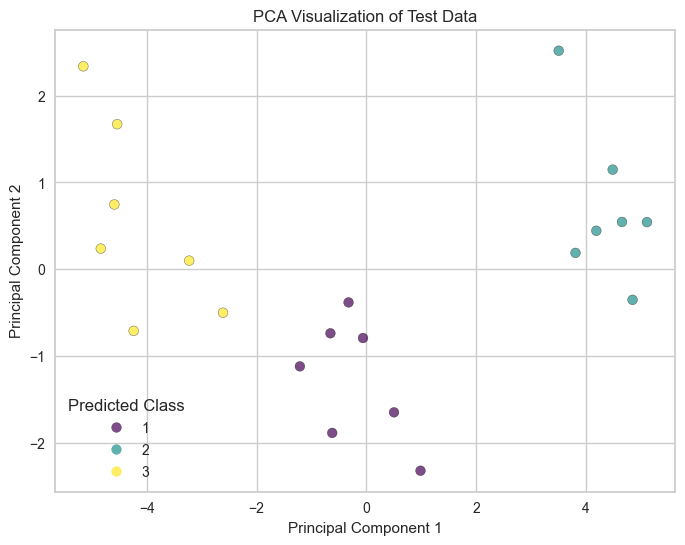

In [69]:
# TO DO: Plot test points colored by predicted label (2 marks)
plt.figure(figsize=(8, 6))

scatter_plt = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap="viridis", edgecolor="k", alpha=0.7)

plt.legend(*scatter_plt.legend_elements(), title="Predicted Class")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Data")

plt.show()


### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? 
1. Did PCA work well for this model? How does this relate to the results from the model used? 

*ANSWER HERE*

1. The model did work very well for this data set. This conclusion comes from the fact that the training score was a respectable 0.96 with a test score of 0.95. These are indicators that the model fit well. When analysing our CV results, we also see that mean test and train scores are all very high and work well with the data.

2. Yes the PCA worked well. Our classes are very clearly separated and are distinguishable from one another. This relates to the model results as the high accuracy should be able to determine the difference in classes well for the data given.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

ANSWER HERE

1. I sourced my code from previous Assignments, using similar structure for the pipeline and grid search as I used in Assignment 4 and also using documentation from scikit-learn and geeksforgeeks

2. I completed the steps in order as they required building upon the previous steps. This provided a logical order to the steps to complete the task

3. Generative AI helped in understanding how to use the PCA function with the prompt "Would I need 2 parameters if I want to plot my data?" as I was unsure how to correctly use it. The code example it provided was used to understand it and was used to structure the code I used in the assignment.

4. A challenge I faced was interpreting the visualization of the results of PCA. It helped me by being able to look at the notes and understand what was happening and using a google search of "What does PCA show when it works" to understand that the clear, separate clusters is what we wanted

## Part 2: Neural Networks (28 marks)

For this assignment, you will be practicing using scikit-learn and TensorFlow to implement basic neural networks (MLP). The dataset we will be using is the energy dataset from Yellowbrick (https://www.scikit-yb.org/en/latest/api/datasets/energy.html).

### Step 1: Load data (1 mark)

You will need to load the file and split it into the feature matrix and target vector. Note that this dataset has two targets, heating load and cooling load. To retrieve the single target dataset, you need `return_dataset=False`. 

In [70]:
# TO DO: Load dataset into feature matrix and target vector (1 mark)
from yellowbrick.datasets.loaders import load_energy

X, y = load_energy(return_dataset=False)

print(X.head())

   relative compactness  surface area  wall area  roof area  overall height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing area  glazing area distribution  
0            2           0.0                          0  
1            3           0.0                          0  
2            4           0.0                          0  
3            5           0.0                          0  
4            2           0.0                          0  


### Step 2: Process your dataset (6 marks)

In [71]:
# TO DO: Check if there are any missing values - if yes, decide how to fill them (1 mark)
missing_X = X.isnull().sum().sum()
missing_y = y.isnull().sum().sum()

print(f"There are {missing_X} values missing in X")
print(f"There are {missing_y} values missing in y")

There are 0 values missing in X
There are 0 values missing in y


In [72]:
# TO DO: Check data type for each column and the number of unique values - do you need to encode any of them? (1 mark)
print("X data types: ")
print(X.dtypes)
print("")
print("y data types: ")
print(y.dtypes)
print("")

unique_X = X.nunique()
unique_y = y.nunique()

print("Unique values in X: ")
print(unique_X)
print("")
print("Unique values in y: ")
print(unique_y)

#No encoding needed as theyre all already numerical

X data types: 
relative compactness         float64
surface area                 float64
wall area                    float64
roof area                    float64
overall height               float64
orientation                    int64
glazing area                 float64
glazing area distribution      int64
dtype: object

y data types: 
float64

Unique values in X: 
relative compactness         12
surface area                 12
wall area                     7
roof area                     4
overall height                2
orientation                   4
glazing area                  4
glazing area distribution     6
dtype: int64

Unique values in y: 
586


In [73]:
# TO DO: Check the range of each feature - do you need to scale your data? (1 mark)
print(X.describe().loc[['min', 'max']].T)

#Yes, this should be scaled as ranges vary

                              min     max
relative compactness         0.62    0.98
surface area               514.50  808.50
wall area                  245.00  416.50
roof area                  110.25  220.50
overall height               3.50    7.00
orientation                  2.00    5.00
glazing area                 0.00    0.40
glazing area distribution    0.00    5.00


In [96]:
# TO DO: Split your data into training and testing sets using 20% for test set (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [97]:
# TO DO: Implement scaling and/or encoding here if needed (2 marks for preprocessing properly or justifying why it isn't needed)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", MLPRegressor(random_state=0))
])

### Step 3: Implement Neural Network (MLP) (8 marks)

### Part 1: Use scikit-learn (3 marks)

For each case, you will need to find the predicted target values.

In [98]:
# TO DO: Test using default parameters and max_iter = 10000 (1 mark)
from sklearn.metrics import mean_squared_error, r2_score

mlp_default_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(max_iter=10000))
])

mlp_default_pipeline.fit(X_train, y_train)

y_pred = mlp_default_pipeline.predict(X_test)

mse_1l = mean_squared_error(y_test, y_pred)
r2_1l = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_1l:.4f}")
print(f"R^2 Score: {r2_1l:.4f}")


Mean Squared Error: 5.1945
R^2 Score: 0.9530


In [99]:
# TO DO: Test using two hidden layers with 100 nodes each (1 mark)
mlp_two_hidden = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(max_iter=10000, hidden_layer_sizes=(100, 100)))
])

mlp_two_hidden.fit(X_train, y_train)

y_pred = mlp_two_hidden.predict(X_test)

mse_2l = mean_squared_error(y_test, y_pred)
r2_2l = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_2l:.4f}")
print(f"R^2 Score: {r2_2l:.4f}")

Mean Squared Error: 0.4353
R^2 Score: 0.9961


In [100]:
# TO DO: Test using three hidden layers with 100 nodes each (1 mark)
mlp_three_hidden = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(max_iter=10000, hidden_layer_sizes=(100, 100, 100)))
])

mlp_three_hidden.fit(X_train, y_train)

y_pred = mlp_three_hidden.predict(X_test)

mse_3l = mean_squared_error(y_test, y_pred)
r2_3l = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_3l:.4f}")
print(f"R^2 Score: {r2_3l:.4f}")

Mean Squared Error: 0.4635
R^2 Score: 0.9958


### Part 2: Use TensorFlow (5 marks)

In [79]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Instead of scaling the data using a scikit-learn scaler, you can scale the data using a normalization layer.

In [80]:
# TO DO: Define normalization layer (1 mark)

# Converted training sets to float32 NumPy array as it was not working with float64
X_train_array = X_train.to_numpy().astype('float32')
y_train_array = y_train.to_numpy().astype('float32')

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train_array)

Using `keras.Sequential`, implement an MLP with the same hidden layer setups as above:

In [81]:
# TO DO: Implement MLP with one hidden layer with 100 nodes and the relu activation function (2 marks)
# Compile the model with loss='mean_absolute_error' and optimizer=tf.keras.optimizers.Adam(0.001)
# Fit the model using validation_split=0.2, verbose=0 and epochs=100

from tensorflow.keras import models

model_1l = models.Sequential([
    normalizer,
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1l.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

model_1l.fit(
    X_train_array,
    y_train_array,
    verbose=0,
    validation_split=0.2,
    epochs=100
)

In [82]:
# TO DO: Repeat with two hidden layers with 100 nodes each and the relu activation function (1 mark)

model_2l = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2l.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

history_2hl = model_2l.fit(
    X_train_array,
    y_train_array,
    validation_split=0.2,
    epochs=100,
    verbose=0
)



In [83]:
# TO DO: Repeat with three hidden layers with 100 nodes each and the relu activation function (1 mark)

model_3l = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3l.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

history_3hl = model_3l.fit(
    X_train_array,
    y_train_array,
    validation_split=0.2,
    epochs=100,
    verbose=0
)


### Step 4: Compare the accuracy of both methods (4 marks)

For this part, calculate the mean absolute error for each model and print in a table using pandas

In [101]:
# TO DO: Calculate the MAE for the three scikit-learn tests (1.5 marks)
from sklearn.metrics import mean_absolute_error

y_pred_1l_sk = mlp_default_pipeline.predict(X_test)
y_pred_2l_sk = mlp_two_hidden.predict(X_test)
y_pred_3l_sk = mlp_three_hidden.predict(X_test)

mae_1l_sk = mean_absolute_error(y_test, y_pred_1l_sk)
mae_2l_sk = mean_absolute_error(y_test, y_pred_2l_sk)
mae_3l_sk = mean_absolute_error(y_test, y_pred_3l_sk)

In [102]:
# TO DO: Calculate the MAE for the three TensorFlow tests (1.5 marks)
y_pred_1l_tf = model_1l.predict(X_test)
y_pred_2l_tf = model_2l.predict(X_test)
y_pred_3l_tf = model_3l.predict(X_test)

mae_1l_tf = mean_absolute_error(y_test, y_pred_1l_tf)
mae_2l_tf = mean_absolute_error(y_test, y_pred_2l_tf)
mae_3l_tf = mean_absolute_error(y_test, y_pred_3l_tf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [103]:
# TO DO: Print the results (1 mark)
mae_comparison = pd.DataFrame({
    '1 Hidden Layer': [mae_1l_sk, mae_1l_tf],
    '2 Hidden Layers': [mae_2l_sk, mae_2l_tf],
    '3 Hidden Layers': [mae_3l_sk, mae_3l_tf]
}, index=['Scikit-learn', 'TensorFlow'])

print("Mean Absolute Error Comparison:")
print(mae_comparison)

Mean Absolute Error Comparison:
              1 Hidden Layer  2 Hidden Layers  3 Hidden Layers
Scikit-learn        1.574337          0.47405         0.521978
TensorFlow          1.855072          1.60740         1.010854


### Questions (5 marks)

1. Which model produced the least amount of error?
1. Do the results change if you run your code multiple times? Why or why not?
1.  Why are the numbers different between the scikit-learn and TensorFlow methods when we used the same number of hidden layers and hidden units per layer? List two potential reasons.

*ANSWER HERE*

1. The model with the least amount of error was the scikit model

2. Yes the results change. This is because the randomness of the weight initialization each time the object is initialized. The feature is expected from Neural Networks such as the ones we are using in this lab.

3. The different methods could have different implementations for the "adam" solver that is used which may create different results even with the same arguments being passed at runtime. Another possibility is the random weight distribution may work better for our dataset using the scikit learn methods rather than the tensorflow methods even if they are performing the same actions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

ANSWER HERE

1. My code was sourced from the same websites as part one, using documentation from scikit and geeksforgeeks

2. The steps were completed in order as it made it simple to follow, although they could have been completed in a different order, starting with the tensor flow rather than the scikit parts.

3. I used generative AI to explain why my code was producing strange results as the MLPRegressor with scikit was generating a strange output for the 2-layer version with randomstate=0 and it explained that this was due to the initialization sometimes being incorrect. This made sense as the 1 and 3 layer versions were working as intended. I did not need to modify any code as it was not produced, only an explanation.

4. I struggled downloading the tensorflow on my windows device. This was a struggle due to the settings of my computer and was easily resolved by following the tracecall for the error.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

1. I enjoyed learning about how two different producers of similar code (Neural Network Methods) can generate vastly different results, even when doing the same thing at their root. This is useful to know as it can help us decide if the tools we are using are the correct ones for the dataset we are using or if its more efficient to use another tool.

Something I found interesting was the way the Neural Network can still produce different results each time the code is ran as it is inherently created to do so. I've rarely worked with code that can change in such a way without changing the base code and it opened up a new perspective for the capabilities in machine learning